# Correlations in Cryptocurrency and Finance Data
## by Paul Freitas

At the present time, stocks could very well be the most common investment vehicle for American investors. Stock portfolios, including those containing index funds based on collections of stocks like the S&P 500 index, are a common feature of individual and corporate investments. More recently, however, cryptocurrencies like Bitcoin are becoming a common investment vehicle as well. Although the nature of the two investment types are different, it seems possible that the investment types rise and fall in a connected way. When more money is added to or removed from the overall market of investments, for example, it is possible that cryptocurrencies and stocks might rise or fall together. If investors are optimistic about one type of investment but pessimistic about another, one might rise in value while the other falls.

In this part of my data science portfolio, we examine some common cryptocurrency prices and compare them with some stock indices to see if there are any correlations that might have led to actionable investment insights. The correlations we examine are:

1. Simple statistical correlations between sets of prices
1. Comparison of linear regression model parameters using standardized pricing data

Python will be the analysis tool for this exercise.

We start by importing a series of necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

Here we load the data we will use in this analysis and store it in preliminary Pandas dataframes. The data is taken from the financial Web site investing.com, which offers historical pricing data for cryptocurrencies and stock indices. This data has been extracted manually into CSV files named in the code below, and stored locally. The data extracted includes the columns "Date", "Price", "Open", "High", "Low", "Vol.", and "Change %." The information extracted is for dates January 21, 2025, through April 21, 2025.

In [2]:
s_and_p = pd.read_csv("S&P 500 Historical Data.csv",thousands=',')
dji = pd.read_csv("Dow Jones Industrial Average Historical Data.csv",thousands=',')
btc = pd.read_csv("Bitcoin Historical Data.csv",thousands=',')
sol = pd.read_csv("Solana Historical Data.csv",thousands=',')
bnb = pd.read_csv("BNB Historical Data.csv",thousands=',')
xrp = pd.read_csv("XRP Historical Data.csv",thousands=',')
eth = pd.read_csv("Ethereum Historical Data.csv",thousands=',')
doge = pd.read_csv("Dogecoin Historical Data.csv",thousands=',')

Now we must transform the loaded data into the data we are interested in for this analysis. We want only the date and the daily closing price, labeled "Price," for each asset type. To simplify analysis, we cut down all our dataframes to include only this information.

In [3]:
s_and_p = s_and_p[["Date","Price"]]
s_and_p.rename(columns={"Price": "s_and_p_price"}, inplace=True)
dji = dji[["Date","Price"]]
dji.rename(columns={"Price": "dji_price"}, inplace=True)
btc = btc[["Date","Price"]]
btc.rename(columns={"Price": "BTC_price"}, inplace=True)
sol = sol[["Date","Price"]]
sol.rename(columns={"Price": "SOL_price"}, inplace=True)
bnb = bnb[["Date","Price"]]
bnb.rename(columns={"Price": "BNB_price"}, inplace=True)
xrp = xrp[["Date","Price"]]
xrp.rename(columns={"Price": "XRP_price"}, inplace=True)
eth = eth[["Date","Price"]]
eth.rename(columns={"Price": "ETH_price"}, inplace=True)
doge = doge[["Date","Price"]]
doge.rename(columns={"Price": "DOGE_price"}, inplace=True)


We must now merge the data into a single dataframe, labeled _all_data_. Note that there are date gaps for the stock indices, as there is no trading for their component stocks on weekends. The cryptocurrency market runs uninterrupted 24 hours a day, 7 days a week, with no breaks for any reason. To simplify analysis, we use an outer join when we start adding cryptocurrencies to the dataframe, and pull the last valid stock index value to the missing dates using ffill.

In [4]:
all_data = pd.merge_ordered(s_and_p, dji, how="inner")
all_data = pd.merge_ordered(all_data, btc, how="outer", fill_method="ffill")
all_data = pd.merge_ordered(all_data, sol, how="inner")
all_data = pd.merge_ordered(all_data, bnb, how="inner")
all_data = pd.merge_ordered(all_data, xrp, how="inner")
all_data = pd.merge_ordered(all_data, eth, how="inner")
all_data = pd.merge_ordered(all_data, doge, how="inner")
all_data["Date"] = pd.to_datetime(all_data["Date"], format ="%m/%d/%Y")
all_data.head(10)

,Date,s_and_p_price,dji_price,BTC_price,SOL_price,BNB_price,XRP_price,ETH_price,DOGE_price
0,2025-01-21,6049.24,44025.81,106157.2,250.560,692.21,3.1735,3328.30,0.372172
1,2025-01-22,6086.37,44156.73,103684.8,257.517,695.20,3.1780,3242.60,0.362533
2,2025-01-23,6118.71,44565.07,103912.1,253.154,690.18,3.1191,3338.37,0.352027
3,2025-01-24,6101.24,44424.25,104862.3,253.339,680.59,3.1013,3311.05,0.350760
4,2025-01-25,6101.24,44424.25,104742.9,256.091,686.33,3.1078,3318.14,0.353498
5,2025-01-26,6101.24,44424.25,102637.8,240.654,667.56,3.1187,3234.18,0.335993
6,2025-01-27,6012.28,44713.58,102091.7,235.068,679.53,3.0541,3179.47,0.333943
7,2025-01-28,6067.70,44850.35,101349.3,227.191,661.41,3.0591,3077.83,0.318709
8,2025-01-29,6039.31,44713.52,103722.0,227.948,667.78,3.0679,3113.26,0.323964
9,2025-01-30,6071.17,44882.13,104726.9,238.667,677.43,3.1274,3247.22,0.331504


It is helpful to see a simple plot of some of the data.

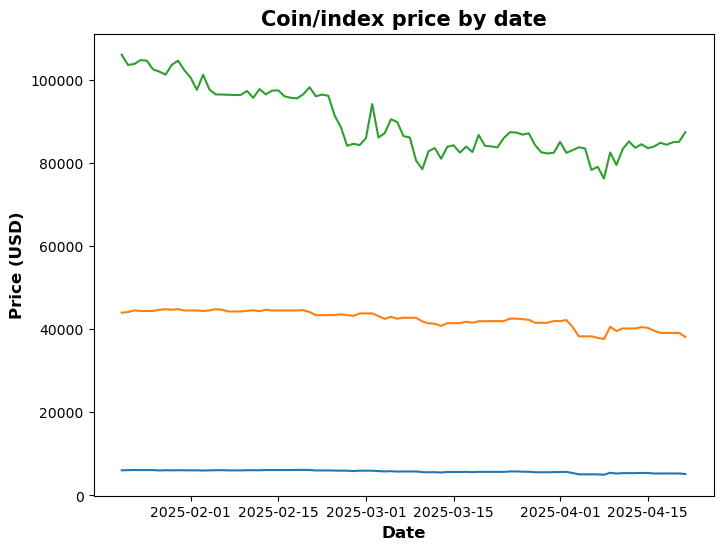

In [5]:
fig = plt.figure(figsize = (8, 6))
sns.lineplot(data = all_data, x = 'Date', y ='s_and_p_price')
sns.lineplot(data = all_data, x = 'Date', y ='dji_price')
sns.lineplot(data = all_data, x = 'Date', y ='BTC_price')
plt.title('Coin/index price by date', weight='bold', fontsize = 15)
plt.xlabel('Date', weight='bold', fontsize = 12)
plt.ylabel('Price (USD)', weight='bold', fontsize = 12)
plt.show()

We see that the prices are on dramatically different scales. For what we are about to do, this is a problem.

## Regression analysis

We want to see if Bitcoin prices are related to prices of other assets. We will start by doing a linear regression model of BTC prices as a function of other commodity prices. If we first standardize the data, the absolute value of the model coefficients becomes a measure of how strongly correlated a given asset price is to Bitcoin price, with 1 being high and 0 being low. We do that analysis here.

To include time in the analysis, we sequentially index the dates by number of days since January 21. This date number can then be standardized.

In [6]:
# Create a date number column for easy standardization, and divide up the data into independent and dependent
# variable dataframes.
X = all_data.drop(["BTC_price", "Date"], axis=1)
X["day_no"] = X.index - X.index[0]
y = all_data["BTC_price"]

# Scale the data for use with a regression model.
scaler = StandardScaler()
all_data_p = all_data.drop("Date", axis=1)
all_data_p["day_no"] = all_data_p.index - all_data_p.index[0]
all_data_p = pd.DataFrame(scaler.fit_transform(all_data_p), columns=all_data_p.columns)

Xp = all_data_p.drop("BTC_price", axis=1)
print(Xp.head())
yp = all_data_p["BTC_price"]

# Create training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    Xp, yp, test_size=0.3, random_state=101)

# Create a regression model.
model = LinearRegression()

# Fit the model.
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Model evaluation
print('mean_squared_error: ', mean_squared_error(y_test, predictions))
print('mean_absolute_error: ', mean_absolute_error(y_test, predictions))
print('Correlation coefficient between predicted and test data: ', np.corrcoef(y_test, predictions))

   s_and_p_price  dji_price  SOL_price  BNB_price  XRP_price  ETH_price  \
0       0.925409   0.768500   2.172091   1.946401   2.224559   1.923292   
1       1.042450   0.834056   2.338461   2.023777   2.237809   1.766159   
2       1.144392   1.038525   2.234124   1.893867   2.064374   1.941756   
3       1.089323   0.968012   2.238548   1.645693   2.011961   1.891664   
4       1.089323   0.968012   2.304360   1.794235   2.031101   1.904664   

   DOGE_price    day_no  
0    2.529279 -1.713121  
1    2.372444 -1.675051  
2    2.201502 -1.636982  
3    2.180887 -1.598913  
4    2.225437 -1.560843  
mean_squared_error:  0.03849161938343902
mean_absolute_error:  0.15129871070063333
Correlation coefficient between predicted and test data:  [[1.         0.98275635]
 [0.98275635 1.        ]]


Note the final Pearson correlation coefficients between the test and predicted data is quite close to 1 (0.98275635). The model is fitting the data quite well.

We can now examine the model coefficients.

In [7]:
model.coef_

array([ 0.49303458, -0.36750086,  0.74616722, -0.03414955,  0.02519897,
        0.72229024, -0.09780742,  0.49735523])

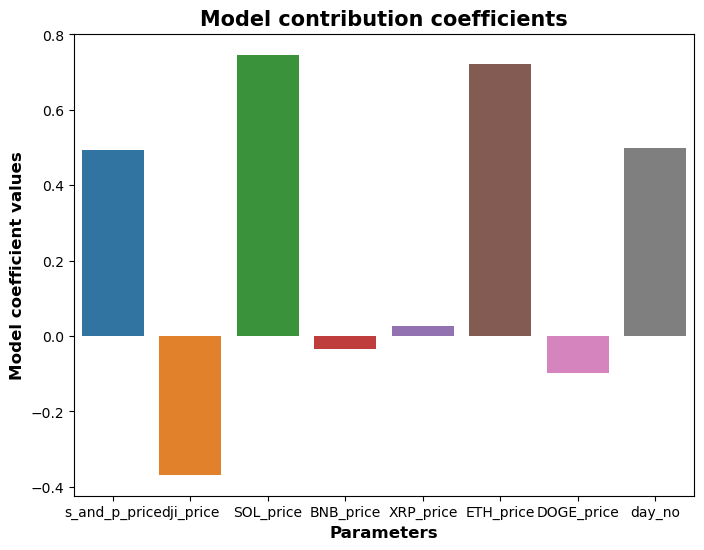

In [8]:
modresults = pd.DataFrame(model.coef_)
modresults = modresults.T
modresults.reset_index(drop=True)
modresults.columns = Xp.columns
fig = plt.figure(figsize = (8, 6))
sns.barplot(data = modresults)
plt.title('Model contribution coefficients', weight='bold', fontsize = 15)
plt.xlabel('Parameters', weight='bold', fontsize = 12)
plt.ylabel('Model coefficient values', weight='bold', fontsize = 12)
plt.show()

From this we infer that the greatest contributors to the model are, in order, SOL_price, ETH_price, day_no, s_and_p_price, and dji_price, with BNB_price, XRP_price, and DOGE_price having little to no contribution in this time period. Note that dji_price is negatively correlated. This suggests money flowing out of/into the Dow Jones and into/out of BTC.

## Pure correlation analysis

It is interesting to do a simple correlation analysis of the unscaled data to compare with the regression analysis above. To do so, we simply find Pearson correlation coefficients for the prices of interest and Bitcoin prices. Numbers closer to 1 are better.

In [9]:
np.corrcoef(X["s_and_p_price"], y)

array([[1.        , 0.80829063],
       [0.80829063, 1.        ]])

In [10]:
np.corrcoef(X["dji_price"], y)

array([[1.        , 0.79472645],
       [0.79472645, 1.        ]])

In [11]:
np.corrcoef(X["day_no"], y)

array([[ 1.        , -0.87242169],
       [-0.87242169,  1.        ]])

In [12]:
np.corrcoef(X["SOL_price"], y)

array([[1.        , 0.96911472],
       [0.96911472, 1.        ]])

In [13]:
np.corrcoef(X["BNB_price"], y)

array([[1.        , 0.77157495],
       [0.77157495, 1.        ]])

In [14]:
np.corrcoef(X["XRP_price"], y)

array([[1.        , 0.89964186],
       [0.89964186, 1.        ]])

In [15]:
np.corrcoef(X["ETH_price"], y)

array([[1.        , 0.95068969],
       [0.95068969, 1.        ]])

In [16]:
np.corrcoef(X["DOGE_price"], y)

array([[1.        , 0.96425751],
       [0.96425751, 1.        ]])

In [17]:
np.corrcoef(y, y)

array([[1., 1.],
       [1., 1.]])

What we see here is that the BTC price tendency strongly correlates with other cryptocurrency prices, like ETH and SOL. Beyond that, this analysis is not particularly revealing, as the Pearson correlations are sufficiently low as to be questionable.

## Conclusions

The regression analysis on this data yielded a seemingly high-quality model which provided some insight into market movements over the time period of interest. Pure Pearson correlations of the unscaled data were much less revealing.